# I. Loading and understanding data

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from  matplotlib.ticker import PercentFormatter

In [2]:
# Import data
df = pd.read_csv('car_evaluation.csv')
# Convert the column names into first row
df = pd.DataFrame(np.vstack([df.columns, df]))
# Name columns
column_names = ['buying','mantenance', 'doors', 'persons', 'lug_boot', 'safety', 'decision']
df.columns = column_names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      1728 non-null   object
 1   mantenance  1728 non-null   object
 2   doors       1728 non-null   object
 3   persons     1728 non-null   object
 4   lug_boot    1728 non-null   object
 5   safety      1728 non-null   object
 6   decision    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [16]:
df.describe()

,buying,mantenance,doors,persons,lug_boot,safety,decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,5,4,4,3,3,4
top,vhigh,high,2,4,small,low,unacc
freq,432,432,432,576,576,576,1210


### 1) Check missing value

In [7]:
# Check missing value
df[df.isna()].count()

buying        0
mantenance    0
doors         0
persons       0
lug_boot      0
safety        0
decision      0
dtype: int64

There is no missing value

### 2) Distribution between classes

In [26]:
# Find and count unique values of decision
decision_unique_value = df['decision'].value_counts()
df_decision = pd.DataFrame({'Class':decision_unique_value.index,'Count':decision_unique_value.values })
df_decision['Percent'] = round(df_decision['Count']*100/df_decision['Count'].sum(),2)
df_decision

,Class,Count,Percent
0,unacc,1210,70.02
1,acc,384,22.22
2,good,69,3.99
3,vgood,65,3.76


Text(0.5, 1.0, 'Distribution of decision')

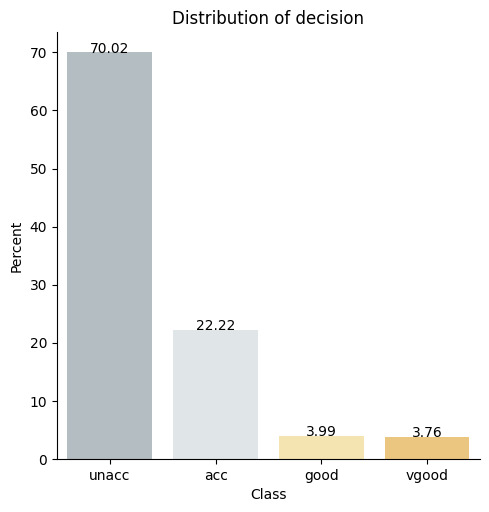

In [27]:
# function to add value labels
sns.catplot(df_decision, x='Class', y= 'Percent', kind= 'bar', order = ['unacc','acc', 'good', 'vgood'], hue_order=['unacc','acc', 'good', 'vgood'], palette=['#b2bec3','#dfe6e9','#ffeaa7','#fdcb6e'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(df_decision['Class'],df_decision['Percent'])
plt.title("Distribution of decision")

From the chart, we can see that:
* unacceptable class is dominant with 70%
* acceptable class accounts for 22%
* mere of good and very good class.

### 2) Divide four classes into two classes
acc and unacc

In [29]:
df_origin = df.copy()

In [30]:
df['decision'] = df['decision'].replace('good', 'acc')    
df['decision'] = df['decision'].replace('vgood', 'acc')

In [31]:
decision_unique_value2 = df['decision'].value_counts()
df_decision2 = pd.DataFrame({'Class':decision_unique_value2.index,'Count':decision_unique_value2.values })
df_decision2['Percent'] = round(df_decision2['Count']*100/df_decision2['Count'].sum(),2)
df_decision2

,Class,Count,Percent
0,unacc,1210,70.02
1,acc,518,29.98


Text(0.5, 1.0, 'Distribution of decision')

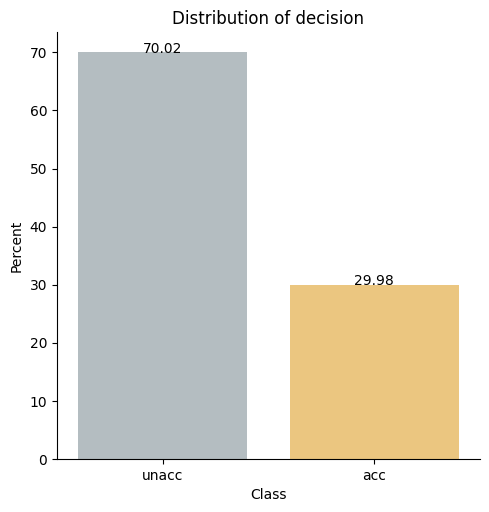

In [33]:
# function to add value labels
sns.catplot(df_decision2, x='Class', y= 'Percent', kind= 'bar', order = ['unacc','acc'], hue_order=['unacc','acc'], palette=['#b2bec3','#fdcb6e'])
addlabels(df_decision2['Class'],df_decision2['Percent'])
plt.title("Distribution of decision")

# II. Exploratory data analysis

## 1) Buying vs decision

Text(0.5, 1.0, 'Buying vs decision')

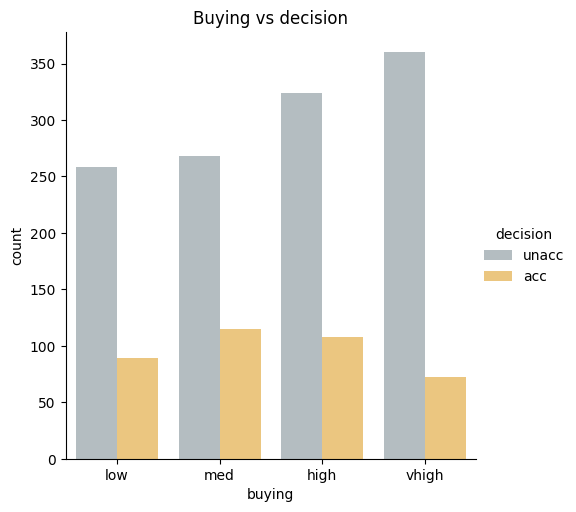

In [89]:
sns.catplot(df, x='buying', hue='decision', order = ['low','med','high','vhigh'], hue_order=['unacc','acc'], kind='count', palette=['#b2bec3','#fdcb6e'])
plt.title("Buying vs decision")

* Price can negatively affect decisions.
* The number of unacc decisions increases together with the price.
* The reverse pattern is true for acc decision.

## 2) Mantenance cost vs decision

Text(0.5, 1.0, 'Mantenance vs decision')

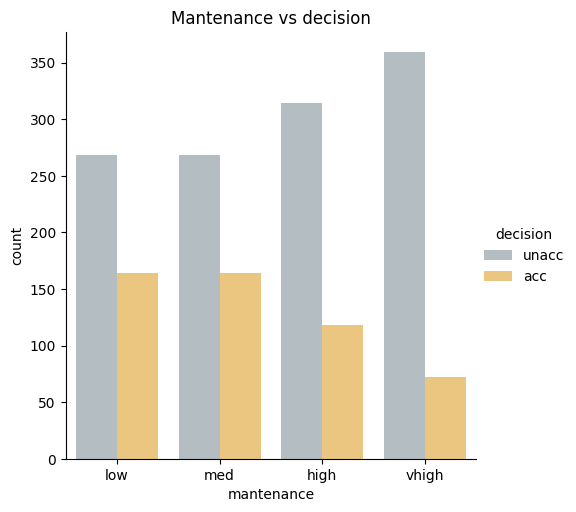

In [82]:
sns.catplot(df, x='mantenance', hue='decision', order = ['low','med','high','vhigh'], hue_order=['unacc','acc'], kind='count', palette=['#b2bec3','#fdcb6e'])
plt.title("Mantenance vs decision")

* The number of decisions are almost the same in low and medium mantenance cost
* Very high cost mantenance has the highest number of unacc decision and lowest acc decisions.

## 3) Doors vs decision

In [84]:
df['doors']

0           2
1           2
2           2
3           2
4           2
        ...  
1722    5more
1723    5more
1724    5more
1725    5more
1726    5more
Name: doors, Length: 1727, dtype: object

Text(0.5, 1.0, 'Doors vs decision')

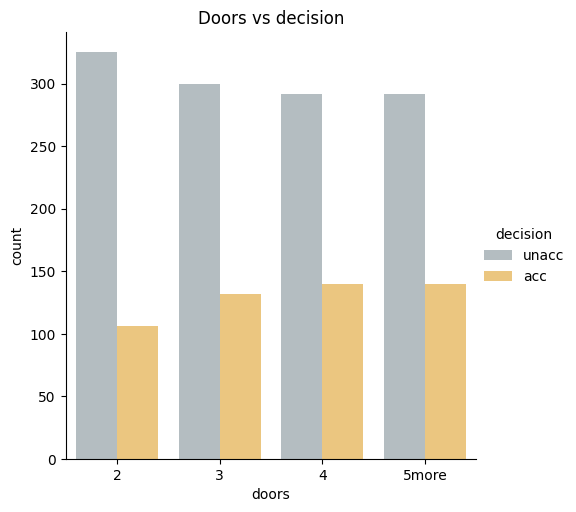

In [85]:
sns.catplot(df, x='doors', hue='decision', hue_order=['unacc','acc'], kind='count', palette=['#b2bec3','#fdcb6e'])
plt.title("Doors vs decision")

* The increase of decision throughout the doors are quite slight.
* It seems that doors is not a good feature to classify

## 4) Persons vs decision 

Text(0.5, 1.0, 'Persons vs decision')

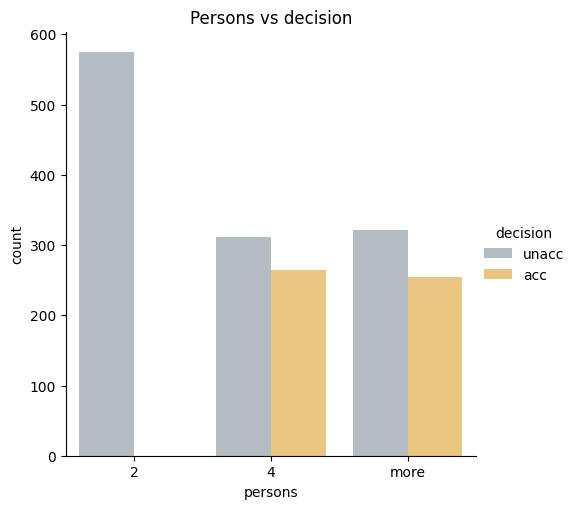

In [86]:
sns.catplot(df, x='persons', hue='decision', hue_order=['unacc','acc'], kind='count', palette=['#b2bec3','#fdcb6e'])
plt.title("Persons vs decision")

* There are only unacceptable decisions for 2 persons
* The gap between the figures for 4 persons and more is not big.

## 5) Lug_boot vs decision

Text(0.5, 1.0, 'Lug_boot vs decision')

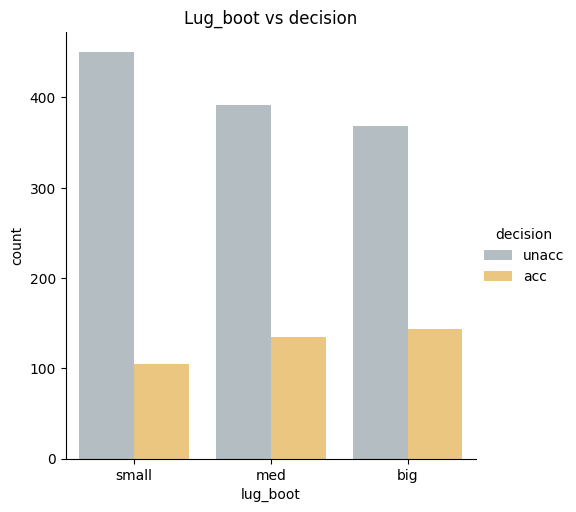

In [90]:
sns.catplot(df, x='lug_boot', hue='decision', hue_order=['unacc','acc'], kind='count', palette=['#b2bec3','#fdcb6e'])
plt.title("Lug_boot vs decision")

* Small lug_boot has the lowest number of acc decision and highest for unacc decision
* There is slight increase in acc decision when the size of lug_boot bigger and the reverse pattern for unacc decisions

## 6) Safety vs decision

Text(0.5, 1.0, 'Safety vs decision')

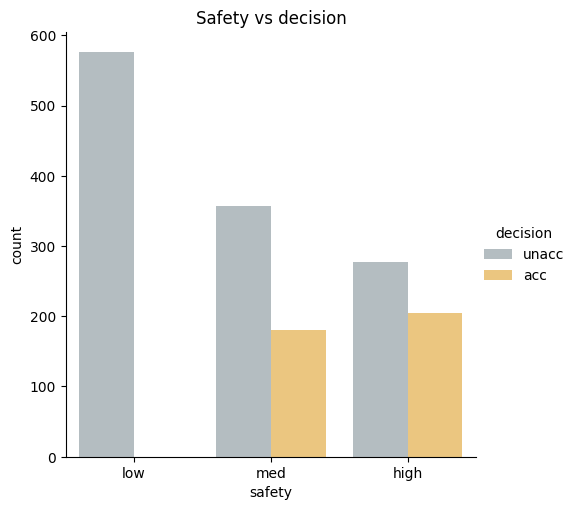

In [91]:
sns.catplot(df, x='safety', hue='decision', order=['low','med','high'], hue_order=['unacc','acc'], kind='count', palette=['#b2bec3','#fdcb6e'])
plt.title("Safety vs decision")

* There are only unacceptable decisions with low safety
* There is slight increase in acc decision when the size of safety bigger and the reverse pattern for unacc decisions

=> Buying (price), mantenance, persons, lug_boot and safety are interesting for classifying decisions.

# III. Preprocessing

* buying, mantenance:
vhigh: 0,
high: 1,
med: 2,
low: 3, 

* doors:
2: 0,
3: 1,
4: 2,
5more: 3,

* persons:
2: 0,
4: 1,
more: 2,

* lug_boot:
small: 0,
med: 1,
big: 2,

* safety:
med: 0,
high: 1,
low: 2,

* decision:
unacc: 0,
acc: 1




In [42]:
# Preprocessing class
class Preprocessing:
    def __init__(self, data):
        self.data = data

    # Create a function to transform categorical data
    def transform_categorical_data(self, column):
        '''
        The function is to transforming categorical data to numerical data so that KNN can calculate distance

        Args:
            column: name of column that will be transfered
        
        Returns:
            new data column
        '''
        categorical_values = self.data[column].unique()
        new = 0
        for categorical in categorical_values:
            self.data[column] = self.data[column].replace(categorical, new)
            new += 1
        return self.data[column]

In [29]:
df.dtypes

buying        object
mantenance    object
doors         object
persons       object
lug_boot      object
safety        object
decision      object
dtype: object

Transform nominal and ordinal data from buying, mantenance, lug_boot, safety and decision

In [43]:
preprocessing = Preprocessing(df)
df['buying'] = preprocessing.transform_categorical_data('buying')
df['mantenance'] = preprocessing.transform_categorical_data('mantenance')
df['doors'] = preprocessing.transform_categorical_data('doors')
df['persons'] = preprocessing.transform_categorical_data('persons')
df['lug_boot'] = preprocessing.transform_categorical_data('lug_boot')
df['safety'] = preprocessing.transform_categorical_data('safety')
df['decision'] = preprocessing.transform_categorical_data('decision')

In [44]:
# Data after processing
df.head(10)

,buying,mantenance,doors,persons,lug_boot,safety,decision
0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,0
2,0,1,0,1,0,2,0
3,0,1,0,1,1,0,0
4,0,1,0,1,1,1,0
5,0,1,0,1,1,2,0
6,0,1,0,1,2,0,0
7,0,1,0,1,2,1,0
8,0,1,0,1,2,2,0
9,0,1,0,2,0,0,0


# III. Building KNN from scratch

In [57]:
class KNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    # Calculate distance between two points using Euclidean
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.square(x1-x2)))

    # Store x_train and y_train
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Predict X
    def predict(self, X):
        predictions = []
        for x in X:
            prediction = self._predict(x)
            predictions.append(prediction)
        return np.array(predictions)

    # Predict single x in X_test
    def _predict(self, x):
        distances = []
        # Calculate the distances from x to all points in X_train
        for x_train in self.X_train:
            distance = self.euclidean_distance(x,x_train)
            distances.append(distance)
        distances = np.array(distances)
        # Get index of n_neighbors after sorting distances
        n_neighbors_idxs = np.argsort(distances)[: self.n_neighbors]
        # Trace back to find labels of n_neighbors
        labels = self.y_train[n_neighbors_idxs]
        labels = list(labels)
        # Find the most frequency label which is the predict label
        most_occuring_value = max(labels,key=labels.count)
        return most_occuring_value

In [97]:
class Evaluation:
    '''
    This is document of Evaluatin class.
    Use this class to do some following tasks:

    Methods:
    - '__init__': initializes the class
    - 'run_model': to run KNN
    - 'calculate_accuracy': to compute accuracy of KNN model
    - 'compare_metrics_k': to calculate the accuracy and f1_score for KNN model with the list of k
    - 'calculate_confusion_matrix': to calculate the confusion matrix for a single k
    - 'plot_evaluation': to plot the accuracy and f1_score of model with different k values
    '''

    def __init__(self, k_range, X_train, y_train, X_test, y_test):
        self.k_range = k_range
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.neighbors = np.arange(1,self.k_range)

    # Running model
    def run_model(self, k):
        '''
        This function is to run the KNN model

        Dependencies: none

        Args:
        k: the number of neighbors

        Returns:
        predicted_results: array of predicted results
        '''
        knn = KNN(k)
        knn.fit(self.X_train, self.y_train)
        predicted_results = knn.predict(self.X_test)
        return(predicted_results)
    
    # Calculate accuracy
    def calculate_accuracy(self,y_pred, y_true):
        '''
        This function is to calculate the accuracy of KNN model with a particular k

        Dependencies:
        run_model: this function should be called before calculate_accuracy

        Args:
        y_pred: array of predicted class by model
        y_true: array of actual class we already have

        Returns:
        accuracy: value for the accuracy of model
        '''
        correct_prediction = np.sum(y_pred==y_true)
        accuracy = correct_prediction/y_true.shape[0]
        return(accuracy)

    # Function compare accuracy of many different values of K
    def calculate_metrics_k(self):
        ''' 
        This function is to calculate the accuracy, recall_score, precision_score and f1 score of many k-neighbors

        Dependencies: none

        Args: none

        Returns: none

        '''

        # Setup arrays to store training and test accuracies
        self.test_accuracy = np.empty(len(self.neighbors))
        self.f1_scores = np.empty(len(self.neighbors))
        self.recall_score = np.empty(len(self.neighbors))
        self.precision_score = np.empty(len(self.neighbors))
        # Call model and compute accuracy for each K
        for i,k in enumerate(self.neighbors):
            # Calling run_model funtion
            predicted_results = self.run_model(k)
            # Compute accuracy
            self.test_accuracy[i] = self.calculate_accuracy(predicted_results, self.y_test)
            # Compute recall
            self.recall_score[i] = recall_score(self.y_test, predicted_results)
            # Compute precision
            self.precision_score[i] = precision_score(self.y_test, predicted_results)
            # Compute f1_score
            self.f1_scores[i] = f1_score(self.y_test, predicted_results)

    # Function calculate confusion matrix
    def calculate_confusion_matrix(self, k):
        '''
        This function is to calculate confusion matrix for a particular k
        
        Dependencies:
        run_model: this function should be called before calculate_confusion_matrix

        Arg:
        k: value of k-neighbors

        Returns: none
        '''
        predicted_results = self.run_model(k)
        confusion_matrix = metrics.confusion_matrix(self.y_test, predicted_results)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
        cm_display.plot()
        plt.show()

    # Function plot accuracy result
    def plot_evaluation(self):
        ''' 
        This function is to plot test accuracy and f1_scores for KNN model with different k values.

        Dependencies:
        compare_accuracy_f1score_k: this function should be called before plot_evaluation

        Args: none
        Returns: none

        '''
        plt.title('k-NN Varying number of neighbors')
        plt.plot(self.neighbors, self.test_accuracy, label='Test accuracy', color='#45aaf2')
        plt.plot(self.neighbors, self.recall_score, label='Recall score', color='#4b7bec')
        plt.plot(self.neighbors, self.precision_score, label='Precision score', color='#a55eea')
        plt.plot(self.neighbors, self.f1_scores, label='F1 score', color='#f7b731')
        plt.legend()
        plt.xlabel('Number of neighbors')
        plt.ylabel('')
        plt.show()

In [59]:
# Create x_train and y_train
X = df.drop(columns=['decision'])
y = df['decision']
# Convert X,y to numpy array
X = X.to_numpy()
y = y.to_numpy()

In [93]:
# Create train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
# Length of train and test
print('Length of train dataset',X_train.shape[0])
print('Length of test dataset',X_test.shape[0])

Length of train dataset 1209
Length of test dataset 519


In [98]:
# Evaluate model with K from 1 to 9   
evaluation = Evaluation(15,X_train, y_train, X_test, y_test)   
# Calculate f1-score and accuracy
evaluation.calculate_metrics_k()
# Plot f1-score and accuracy
evaluation.plot_evaluation()

As can be seen from the chart, K=7 gives us the most accuracy prediction.

Assessing model by confusion matrix with K=7

**TRAM:** 
2. Which issues can happen if k is even number?
3. What if k >= 9 can create higher results than 7?

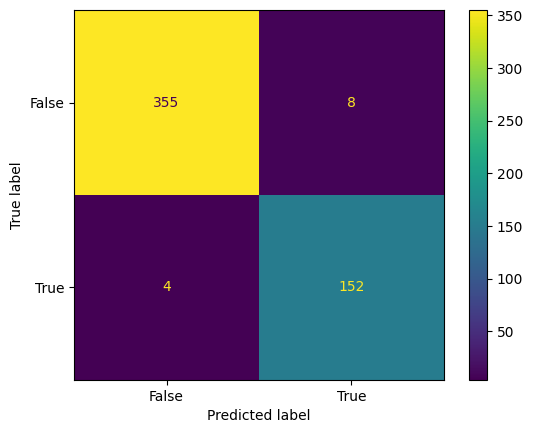

In [21]:
evaluation.calculate_confusion_matrix(7)

**TRAM MORE SUGGESTIONS:**
- You had this evaluation from EDA: "Buying (price), mantenance, persons, lug_boot and safety are interesting for classifying decisions." So you can check how difference of results if only using these columns for prediction.